In [ ]:
!pip install mlxtend
!pip install imbalanced-learn
!pip install itables
!pip install xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [74]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"


from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/diabetes.csv')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(768, 9)

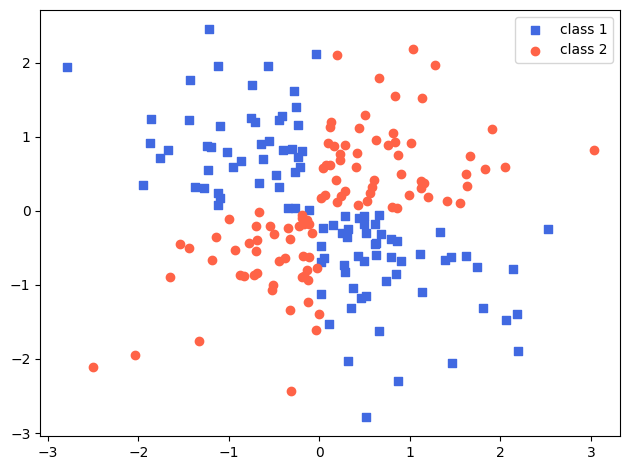

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
x_xor = np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:,0]>0, x_xor[:,1]>0)
y_xor = np.where(y_xor, 1, 0)
plt.scatter(x_xor[y_xor == 1,0], x_xor[y_xor == 1,1], c= 'royalblue', marker='s', label ='class 1')
plt.scatter(x_xor[y_xor == 0,0], x_xor[y_xor == 0,1], c= 'tomato', marker='o', label ='class 2')
plt.legend()
plt.tight_layout()
plt.show()

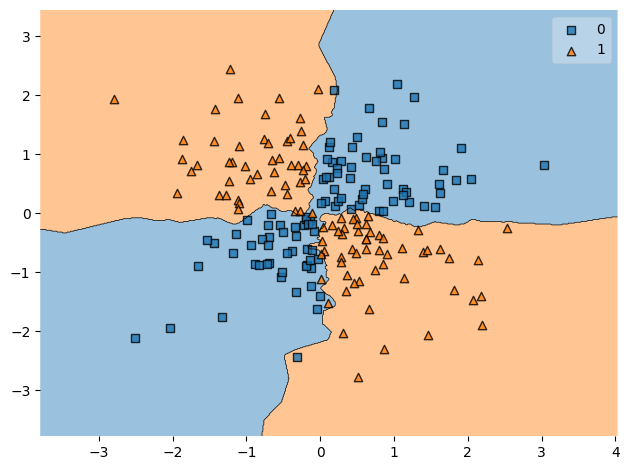

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(x_xor,y_xor)
plot_decision_regions(x_xor,y_xor, clf = knn)
plt.tight_layout()
plt.show()

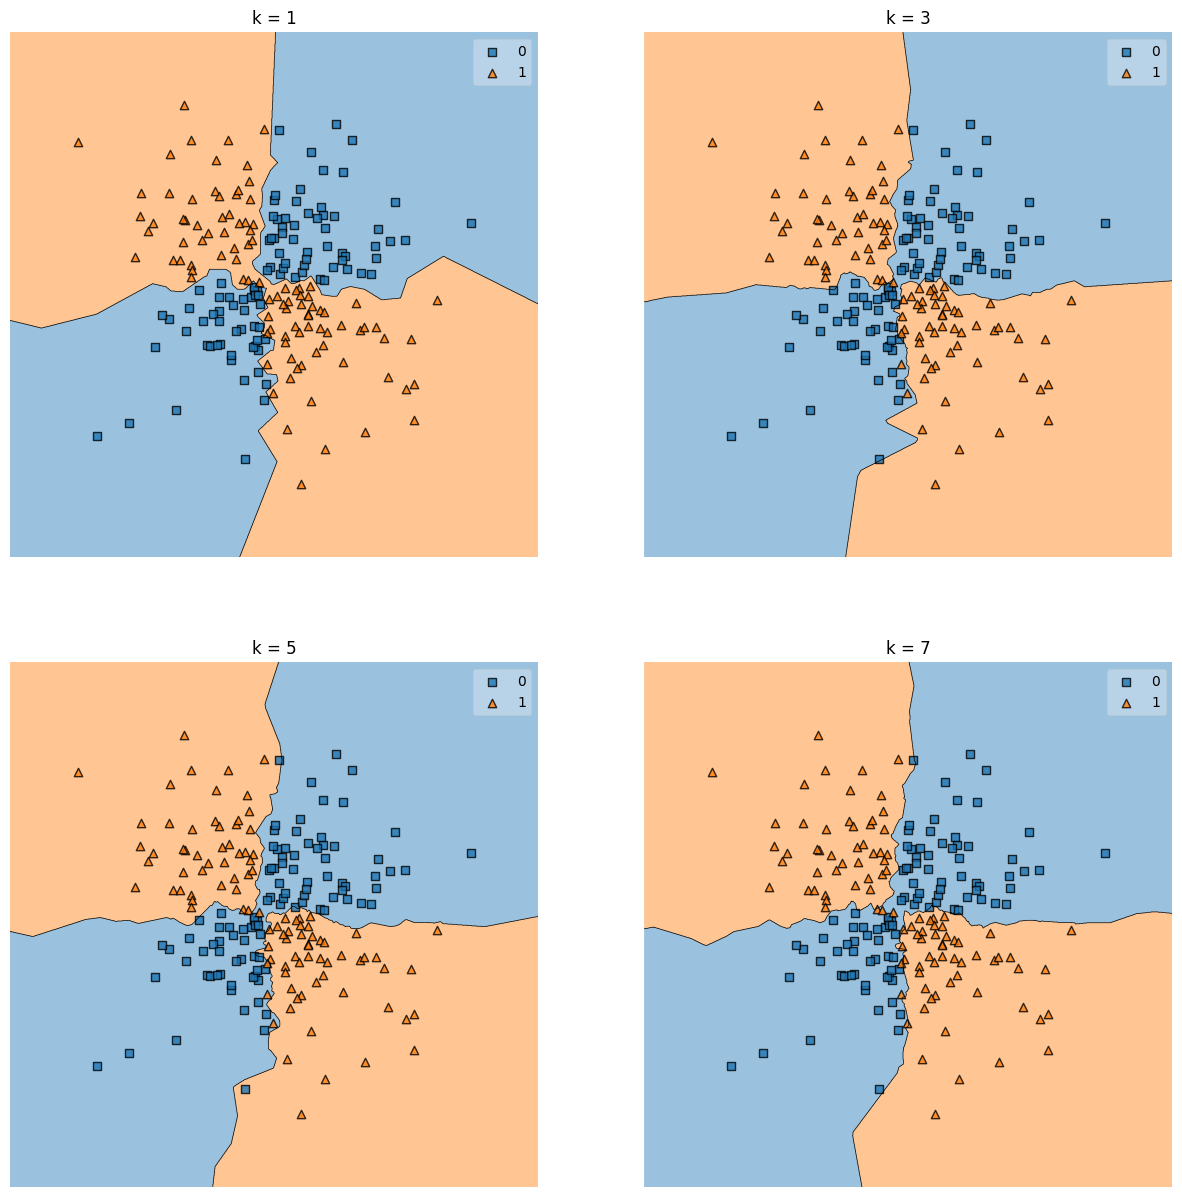

In [ ]:
counter = 1
plt.figure(figsize=(15,15))
for k in range(1,9,2):
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
        knn.fit(x_xor, y_xor)
        plt.subplot(2,2,counter)
        plot_decision_regions(x_xor,y_xor, clf = knn)
        plt.axis('off')
        plt.title(f'k = {k}')
        counter += 1
plt.show()

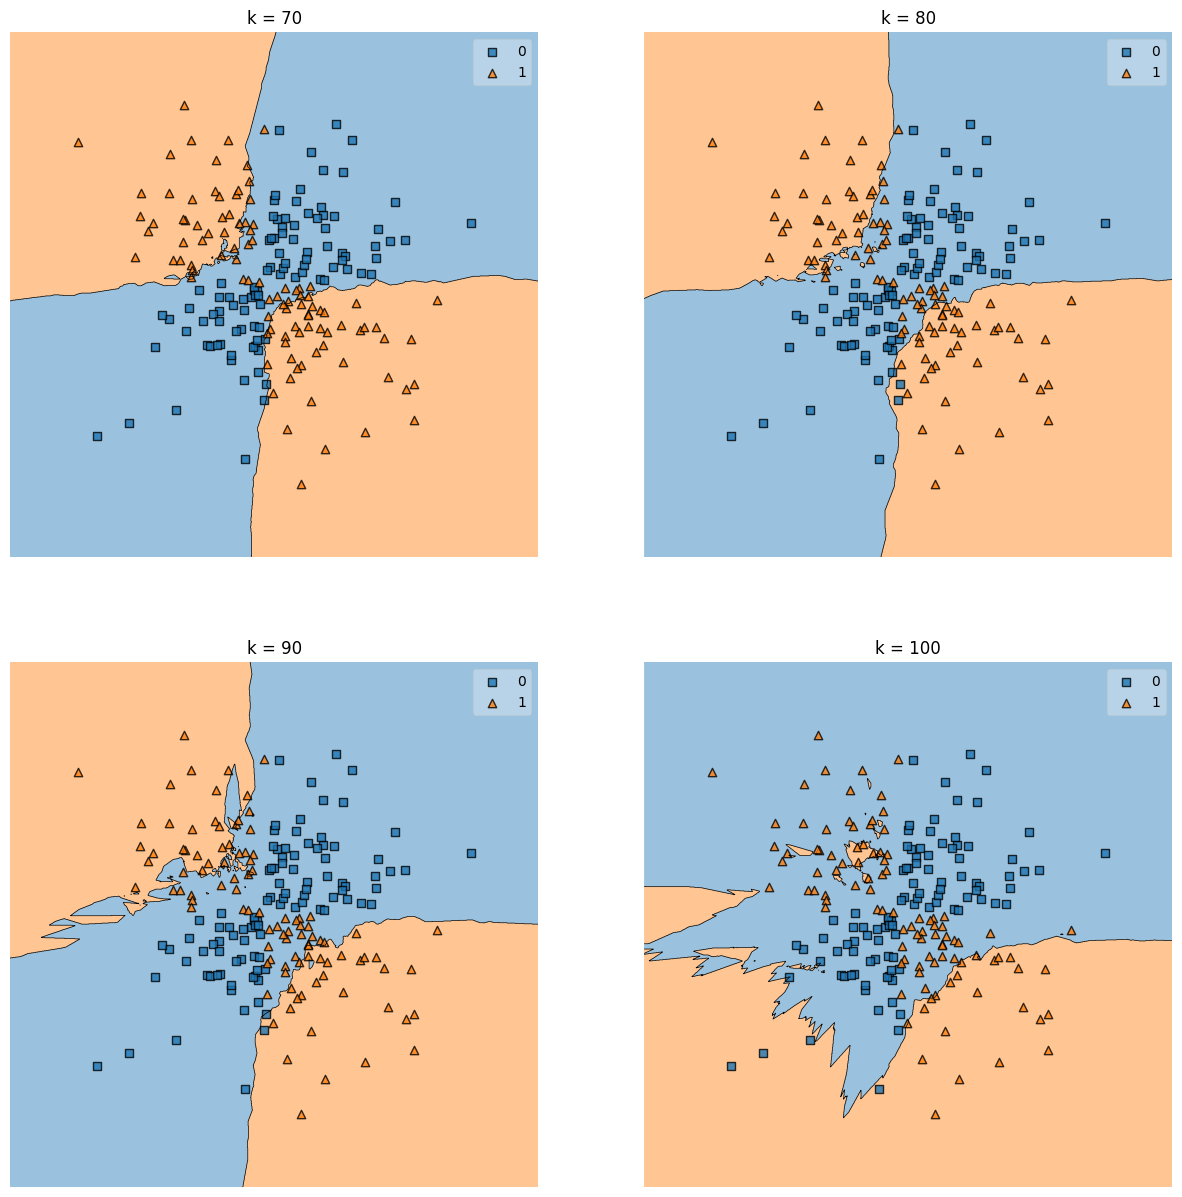

In [ ]:
counter = 1
plt.figure(figsize=(15,15))
for k in range(70,110,10):
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
        knn.fit(x_xor, y_xor)
        plt.subplot(2,2,counter)
        plot_decision_regions(x_xor,y_xor, clf = knn)
        plt.axis('off')
        plt.title(f'k = {k}')
        counter += 1
plt.show()

In [76]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [79]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [80]:
df['Outcome'].value_counts(normalize = True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [81]:
a = df.isnull().sum()
a

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
missing_values = ['NA', 'N/A', 'missing', '', 'unknown','?']
for value in missing_values:
    df.replace(to_replace=value, value=np.nan, inplace=True)

In [83]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.shape

(768, 8)

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)

In [85]:
counter = Counter(y)
print ('Before', counter)

Before Counter({0: 500, 1: 268})


In [86]:
smt = SMOTE(random_state = 5)

In [87]:
x_sm , y_sm = smt.fit_resample(x,y)

In [88]:
counter = Counter(y_sm)
print('After', counter)

After Counter({1: 500, 0: 500})


In [89]:
from sklearn.model_selection import train_test_split
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm, y_sm, test_size=0.2, random_state=5)

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the SVC with probability=True
svm = SVC(random_state=5, gamma=0.01, C=1, probability=True)

# Fit the model
svm.fit(x_train_sm, y_train_sm)

# Predict class labels
y_pred = svm.predict(x_test_sm)

# Predict probabilities
y_pred_proba = svm.predict_proba(x_test_sm)[:, 1]

# Calculate the performance metrics
score_test = {
    'accuracy': accuracy_score(y_test_sm, y_pred),
    'precision': precision_score(y_test_sm, y_pred),
    'recall': recall_score(y_test_sm, y_pred),
    'f1_score': f1_score(y_test_sm, y_pred),
    'auc': roc_auc_score(y_test_sm, y_pred_proba)
}

pprint(score_test)



{'accuracy': 0.745,
 'auc': 0.8489640676608948,
 'f1_score': 0.7085714285714286,
 'precision': 0.7948717948717948,
 'recall': 0.6391752577319587}


In [91]:
from sklearn.pipeline import Pipeline   #Besyar Mohem Pickle kardan
import pickle

svm_pipeline = Pipeline([('sc',StandardScaler()), ('svm',SVC(random_state=5))])
svm_pipeline.fit(x_train_sm,y_train_sm)

pickle.dump(svm_pipeline, open("santander_svm.pickleTest.dat", "wb"))

y_pred = svm_pipeline.predict(x_test_sm)
fpr , tpr , thresholds = roc_curve(y_test_sm,y_pred)
score_test = {'accuracy':accuracy_score(y_test_sm,y_pred),
              'precision':precision_score(y_test_sm,y_pred),
              'recall':recall_score(y_test_sm,y_pred),
              'f1_score':f1_score(y_test_sm,y_pred),
              }
score_test

{'accuracy': 0.74,
 'precision': 0.6991150442477876,
 'recall': 0.8144329896907216,
 'f1_score': 0.7523809523809524}

In [92]:
import pickle
loaded_model = pickle.load(open("santander_svm.pickleTest.dat", "rb"))

In [93]:
y_pred = loaded_model.predict(x_test_sm)
fpr , tpr , thresholds = roc_curve(y_test_sm,y_pred)
score_test = {'accuracy':accuracy_score(y_test_sm,y_pred),
              'precision':precision_score(y_test_sm,y_pred),
              'recall':recall_score(y_test_sm,y_pred),
              'f1_score':f1_score(y_test_sm,y_pred),
              }
score_test

{'accuracy': 0.74,
 'precision': 0.6991150442477876,
 'recall': 0.8144329896907216,
 'f1_score': 0.7523809523809524}

In [94]:
x_test_sm.values[1,:].shape

(8,)

In [95]:
s = loaded_model.predict(x_test_sm.values[3,:].reshape(1,-1))
#voroodi baraye predict bayad az tak bodi reshape shode va be yek araye 2 bodi tabdil shavad.
s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [96]:
y_pred = loaded_model.predict(x_test)   # Test vaghei bayad bar rooye dadehaye gheire smote bashad.
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
score_test = {'accuracy':accuracy_score(y_test,y_pred),
              'precision':precision_score(y_test,y_pred),
              'recall':recall_score(y_test,y_pred),
              'f1_score':f1_score(y_test,y_pred),
              }
score_test

{'accuracy': 0.7662337662337663,
 'precision': 0.6216216216216216,
 'recall': 0.8518518518518519,
 'f1_score': 0.7187499999999999}

In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_sm)
x_pca

array([[ -9.4250432 , -53.01086317],
       [-85.0076721 , -17.9043393 ],
       [174.66400507, -52.64866575],
       ...,
       [-83.78872356,  -9.89533753],
       [201.0860428 , -54.39810131],
       [-85.07231332, -14.40866216]])

In [98]:
x_pca.shape

(800, 2)

In [99]:
from sklearn.decomposition import PCA   # Ba PCA deghat kahesh peida kard, gahi afzayesh peida mikonad.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler  # gahi LDA dar classification behtar javab midahad.
from sklearn.pipeline import Pipeline
import pickle

svm_pipeline = Pipeline([('sc',StandardScaler()),('pca',PCA(n_components=7)), ('svm',SVC(kernel='rbf', random_state=5))])
svm_pipeline.fit(x_train_sm,y_train_sm)

pickle.dump(svm_pipeline, open("santander_svm_pca.pickle_Test.dat", "wb"))

y_pred = svm_pipeline.predict(x_test_sm)
fpr , tpr , thresholds = roc_curve(y_test_sm,y_pred)
score_test = {'accuracy':accuracy_score(y_test_sm,y_pred),
              'precision':precision_score(y_test_sm,y_pred),
              'recall':recall_score(y_test_sm,y_pred),
              'f1_score':f1_score(y_test_sm,y_pred),
              }
score_test

{'accuracy': 0.735,
 'precision': 0.7,
 'recall': 0.7938144329896907,
 'f1_score': 0.7439613526570047}

In [100]:
y_pred = svm_pipeline.predict(x_test)
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
score_test = {'accuracy':accuracy_score(y_test,y_pred),
              'precision':precision_score(y_test,y_pred),
              'recall':recall_score(y_test,y_pred),
              'f1_score':f1_score(y_test,y_pred),
              }
score_test

{'accuracy': 0.7662337662337663,
 'precision': 0.6216216216216216,
 'recall': 0.8518518518518519,
 'f1_score': 0.7187499999999999}

In [101]:
import pickle
loaded_model = pickle.load(open("santander_svm_pca.pickle_Test.dat", "rb"))

In [102]:
y_pred = svm_pipeline.predict(x_test)
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
score_test = {'accuracy':accuracy_score(y_test,y_pred),
              'precision':precision_score(y_test,y_pred),
              'recall':recall_score(y_test,y_pred),
              'f1_score':f1_score(y_test,y_pred),
              }
score_test

{'accuracy': 0.7662337662337663,
 'precision': 0.6216216216216216,
 'recall': 0.8518518518518519,
 'f1_score': 0.7187499999999999}

In [103]:
# Define evaluation metrics function
def clf_score(y_pred, y_true, data_segment):
    print(f'Scores for {data_segment} data')
    print('**********************************')
    scores = {
       'accuracy_score' : accuracy_score(y_true, y_pred),
       'recall_score': recall_score(y_true, y_pred),
       'precision_score': precision_score(y_true, y_pred),
       'f1_score': f1_score(y_true, y_pred)
    }
    return scores

In [104]:
import numpy as np   # Voting Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
X = x_train_sm
y = y_train_sm
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
eclf1 = eclf1.fit(X, y)
y_pred_train_eclf1 = eclf1.predict(x_train_sm)

pprint(clf_score(y_pred_train_eclf1, y_train_sm, 'Train'))

y_pred_test_eclf1 = eclf1.predict(x_test)
pprint(clf_score(y_pred_test_eclf1, y_test, 'Test'))


Scores for Train data
**********************************
{'accuracy_score': 0.85125,
 'f1_score': 0.849936948297604,
 'precision_score': 0.8641025641025641,
 'recall_score': 0.8362282878411911}
Scores for Test data
**********************************
{'accuracy_score': 0.8051948051948052,
 'f1_score': 0.761904761904762,
 'precision_score': 0.6666666666666666,
 'recall_score': 0.8888888888888888}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.shape

(768, 8)

In [106]:
from utils import clf_score
from pprint import pprint
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, stratify=y, random_state=1)
rf = RandomForestClassifier(n_estimators= 400, max_features= 0.8,
                            max_samples= 0.8, max_depth= 4, random_state=1)
rf.fit(x_train, y_train)
y_pred_train = rf.predict(x_train)
pprint(clf_score(y_train,y_pred_train,'Train'))
y_pred_test = rf.predict(x_test)
pprint(clf_score(y_test,y_pred_test,'Test'))


**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.8387622149837134,
 'f1_score': 0.7480916030534351,
 'precision_score': 0.8212290502793296,
 'recall_score': 0.6869158878504673}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.7467532467532467,
 'f1_score': 0.5714285714285714,
 'precision_score': 0.7027027027027027,
 'recall_score': 0.48148148148148145}


In [107]:
rf.feature_importances_

array([0.04246596, 0.48164572, 0.03055571, 0.01697221, 0.03178124,
       0.16823136, 0.09152357, 0.13682422])

In [108]:
dict(zip(x_train.columns,rf.feature_importances_))  # Mohem ######################

{'Pregnancies': 0.04246596035183508,
 'Glucose': 0.4816457244751967,
 'BloodPressure': 0.030555707454542443,
 'SkinThickness': 0.016972212088315692,
 'Insulin': 0.03178124237313168,
 'BMI': 0.16823136036984468,
 'DiabetesPedigreeFunction': 0.09152357275607235,
 'Age': 0.13682422013106146}

In [109]:
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.1,
                            max_depth=5, random_state=1,)
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
pprint(clf_score(y_train,y_pred_train,'Train'))
y_pred_test = xgb.predict(x_test)
pprint(clf_score(y_test,y_pred_test,'Test'))


**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.9837133550488599,
 'f1_score': 0.976303317535545,
 'precision_score': 0.9903846153846154,
 'recall_score': 0.9626168224299065}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.7467532467532467,
 'f1_score': 0.6285714285714287,
 'precision_score': 0.6470588235294118,
 'recall_score': 0.6111111111111112}


In [110]:
xgb.feature_importances_

array([0.08679966, 0.2817534 , 0.08602493, 0.09105667, 0.09312455,
       0.13242798, 0.09828502, 0.13052775], dtype=float32)

In [111]:
x_train = x_train.values

In [112]:
x_train[x_train == 0] = np.nan

In [113]:
xgb = xgboost.XGBClassifier(n_estimators=30, learning_rate=0.1,
                            max_depth=3, random_state=1,)
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
pprint(clf_score(y_train,y_pred_train,'Train'))
y_pred_test = xgb.predict(x_test)
pprint(clf_score(y_test,y_pred_test,'Test'))


**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.8338762214983714,
 'f1_score': 0.7548076923076924,
 'precision_score': 0.7772277227722773,
 'recall_score': 0.7336448598130841}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.7792207792207793,
 'f1_score': 0.6136363636363636,
 'precision_score': 0.7941176470588235,
 'recall_score': 0.5}


In [114]:
# Define classifiers
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = SVC(kernel='rbf', probability=True, random_state=1)
clf4 = xgboost.XGBClassifier(random_state=1)

# Combine classifiers in a VotingClassifier
eclf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svm', clf3), ('xgb', clf4)], voting='soft')


eclf.fit(x_train_sm, y_train_sm)
y_pred_train_eclf = eclf.predict(x_train_sm)

pprint(clf_score(y_pred_train_eclf, y_train_sm, 'Train'))

y_pred_test_eclf = eclf.predict(x_test)
pprint(clf_score(y_pred_test_eclf, y_test, 'Test'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.9825,
 'f1_score': 0.9826732673267328,
 'precision_score': 0.9851116625310173,
 'recall_score': 0.980246913580247}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.935064935064935,
 'f1_score': 0.9107142857142858,
 'precision_score': 0.9444444444444444,
 'recall_score': 0.8793103448275862}


In [115]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle


voting_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=8)),  # Adjust n_components as needed
    ('voting', eclf)
])

voting_pipeline.fit(x_train_sm,y_train_sm)

pickle.dump(voting_pipeline, open("santander_voting_pca.pickle_Test.dat", "wb"))

y_pred_train_voting_pipeline = voting_pipeline.predict(x_train_sm)

pprint(clf_score(y_pred_train_voting_pipeline, y_train_sm, 'Train'))

y_pred_test_voting_pipeline = voting_pipeline.predict(x_test)
pprint(clf_score(y_pred_test_voting_pipeline, y_test, 'Test'))


**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.9825,
 'f1_score': 0.9828009828009828,
 'precision_score': 0.9925558312655087,
 'recall_score': 0.9732360097323601}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.9090909090909091,
 'f1_score': 0.875,
 'precision_score': 0.9074074074074074,
 'recall_score': 0.8448275862068966}


In [116]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle


voting_pipeline = Pipeline([

    ('voting', eclf)
])

voting_pipeline.fit(x_train_sm,y_train_sm)

pickle.dump(voting_pipeline, open("santander_voting_pipeline.pickle_Test.dat", "wb"))  # pickle kardab bad az training ast.

y_pred_train_voting_pipeline = voting_pipeline.predict(x_train_sm)

pprint(clf_score(y_pred_train_voting_pipeline, y_train_sm, 'Train'))

y_pred_test_voting_pipeline = voting_pipeline.predict(x_test)
pprint(clf_score(y_pred_test_voting_pipeline, y_test, 'Test'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.9825,
 'f1_score': 0.9826732673267328,
 'precision_score': 0.9851116625310173,
 'recall_score': 0.980246913580247}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.935064935064935,
 'f1_score': 0.9107142857142858,
 'precision_score': 0.9444444444444444,
 'recall_score': 0.8793103448275862}


In [117]:
loaded_model = pickle.load(open("santander_voting_pipeline.pickle_Test.dat", "rb"))

y_pred_train_loaded_model = loaded_model.predict(x_train_sm)

pprint(clf_score(y_pred_train_loaded_model, y_train_sm, 'Train'))

y_pred_test_loaded_model = loaded_model.predict(x_test)
pprint(clf_score(y_pred_test_loaded_model, y_test, 'Test'))


**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.9825,
 'f1_score': 0.9826732673267328,
 'precision_score': 0.9851116625310173,
 'recall_score': 0.980246913580247}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.935064935064935,
 'f1_score': 0.9107142857142858,
 'precision_score': 0.9444444444444444,
 'recall_score': 0.8793103448275862}


In [119]:
loaded_model = pickle.load(open("santander_voting_pca.pickle_Test.dat", "rb"))

y_pred_train_loaded_model = loaded_model.predict(x_train_sm)

pprint(clf_score(y_pred_train_loaded_model, y_train_sm, 'Train'))

y_pred_test_loaded_model = loaded_model.predict(x_test)
pprint(clf_score(y_pred_test_loaded_model, y_test, 'Test'))



**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.9825,
 'f1_score': 0.9828009828009828,
 'precision_score': 0.9925558312655087,
 'recall_score': 0.9732360097323601}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.9090909090909091,
 'f1_score': 0.875,
 'precision_score': 0.9074074074074074,
 'recall_score': 0.8448275862068966}
